# 4.9 Data Visualizations (Part 2)

## This script contains following points:
- Importing libraries (including libraries for vis: matplotlib, seaborn, scipy)
- Creating bar chart (changing its order by index, adding colors to bars) and exporting bar chart as image outside of Jupyter and exporting visualization as an image, observation
- Creating Histogram and Scatterplot exporting visualization as an image, observation
- Sampling Data and creating line chart for small sample exporting visualization as an image, observation
- Creating line chart for relationship between order time and prices and exporting visualization as an image, observation
- Creating line chart for relationship between age and number of dependants exporting visualization as an image, observation
- Creating scatterplot to see if there a connection between age and income and exporting visualization as an image, observation
- Exporting dataframe to folder

In [31]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [32]:
# Path to the original data
path= r"/Users/mentaykoshzhanova/Desktop/Instacart Basket Analysis"
path

'/Users/mentaykoshzhanova/Desktop/Instacart Basket Analysis'

In [33]:
# Import last updated dataframe
ords_prods_customers_merged= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [34]:
ords_prods_customers_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 37 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   product_id              int64   
 2   add_to_cart_order       int64   
 3   reordered               int64   
 4   Unnamed: 0_x            int64   
 5   user_id                 int64   
 6   order_number            int64   
 7   order_day_of_week       int64   
 8   order_time              int64   
 9   days_since_prior_order  float64 
 10  _merge                  category
 11  Unnamed: 0_y            int64   
 12  product_name            object  
 13  aisle_id                int64   
 14  department_id           int64   
 15  prices                  float64 
 16  exists                  category
 17  price_range_loc         object  
 18  price_ranged_loc        object  
 19  Busiest day             object  
 20  Busiest days            object  
 21  Busies

In [35]:
ords_prods_customers_merged.shape

(32434212, 37)

In [36]:
ords_prods_customers_merged.head()

,order_id,product_id,add_to_cart_order,reordered,Unnamed: 0_x,user_id,order_number,order_day_of_week,order_time,days_since_prior_order,...,order_frequency,First_name,Last_name,Gender,State,Age,Date_joined,Number_of_dependants,Marriage_status,Income
0,2,33120,1,1,3355525,202279,3,5,9,8.0,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
1,104690,33120,2,1,3355530,202279,8,6,10,30.0,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
2,132412,33120,1,1,3355528,202279,6,5,9,30.0,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
3,2808715,33120,1,1,3355527,202279,5,5,13,9.0,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
4,2894949,33120,5,0,3355523,202279,1,5,9,NaN,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119


## 2. Creating charts (bar chart, histogram, scatterplot and line)


### Bar chart and export as an image

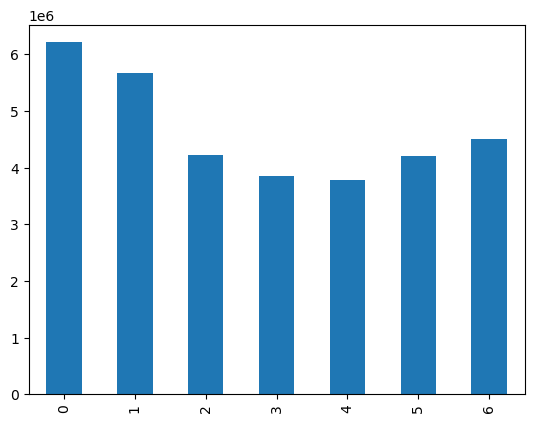

In [37]:
# Creating bar chart for order_day_of_week column
bar = ords_prods_customers_merged['order_day_of_week'].value_counts().sort_index().plot.bar()

In [38]:
# Export it outside of Jupyter in the form of an image file 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

#### Observation
Bar chart shows that busiest days are 0, 1 and 6. Customers stock up during weekend.

### Histogram and Scatterplots and exporting as an image

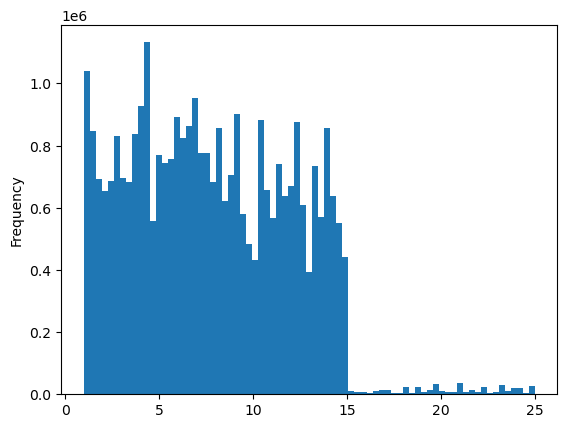

In [43]:
# Create histogram for prices column
hist1 = ords_prods_customers_merged['prices'].plot.hist(bins = 75)

In [44]:
# Export it outside of Jupyter in the form of an image file 
hist1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_frequency.png'))

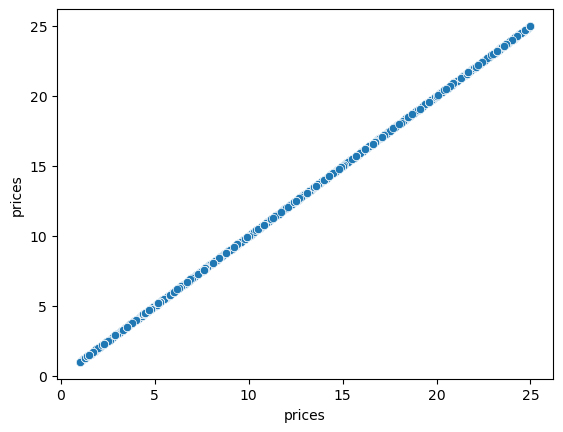

In [45]:
# Use scatterplot to see in vis if any outliers
scat1= sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_customers_merged)

In [46]:
# Export it outside of Jupyter in the form of an image file 
scat1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_frequency_scatter.png'))

#### Observation
After cleaning up prices column previouly, there is no outliers on prices, and we can see that prices are between $1 to $25, which is close to reality.

### Line chart (for sample data)


In [47]:
# In a 70/30 split, 30% sample would statistically resemble the 70% sample but contain less rows.
# Create the sample using np
np.random.seed(4)
# Create a list holding True/False values to the test np.random.rand <=0.7
dev = np.random.rand(len(ords_prods_customers_merged)) <= 0.7

In [48]:
# Store 70% of sample in df big
big = ords_prods_customers_merged[dev]

In [49]:
# Store 30% of sample in df small
small = ords_prods_customers_merged[~dev]

## 3. Line chart for relationship between prices and order day of week

In [50]:
# Create df that contains only columns needed for the chart to speed up the process
df_sample = small[['order_day_of_week','prices']]

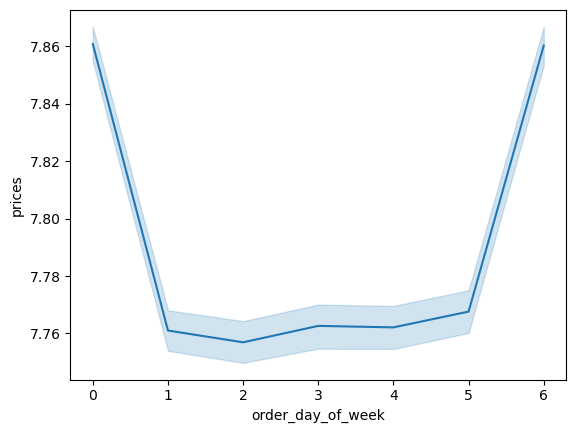

In [51]:
# Create a line chart to show the development of the “prices” column across the days of the week.
line1 = sns.lineplot(data = df_sample, x = 'order_day_of_week',y = 'prices')

In [52]:
# Export it outside of Jupyter in the form of an image file 
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_days.png'))

#### Observation
Line chart shows that prices peak on days zero and six mean that most money is spent on Saturday and Sunday. Which shows that bar chart is accurate too.

### 4. Bar chart for loyalty flag

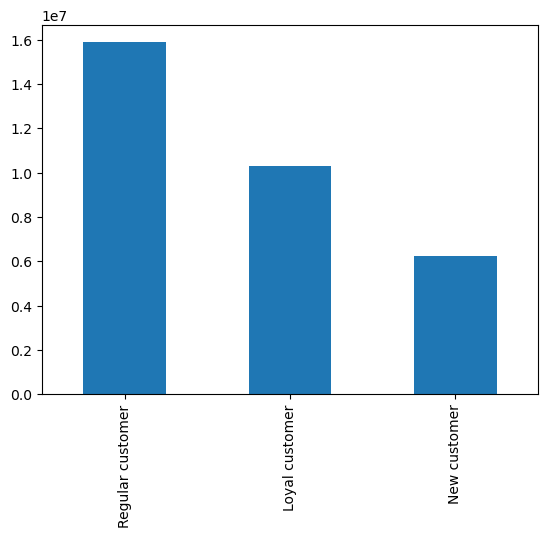

In [54]:
# The marketing team is curious about the distribution of orders among customers in terms of loyalty. 
#Create a bar chart from the “loyalty_flag” column.
bar2 = ords_prods_customers_merged['loyalty_flag'].value_counts().plot.bar()

In [55]:
# Export it outside of Jupyter in the form of an image file 
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag.png'))

### 5 . Line chart to check if there is a difference in expenditure depending on the hour of the day

In [56]:
# Create df that contains only columns needed for the chart to speed up the process
df_sample_order_time = small[['order_time','prices']]
df_sample_order_time

,order_time,prices
0,9,11.3
2,9,11.3
3,13,11.3
6,9,13.4
10,9,3.6
...,...,...
32434188,16,12.5
32434191,10,10.8
32434199,15,4.7
32434204,7,3.5


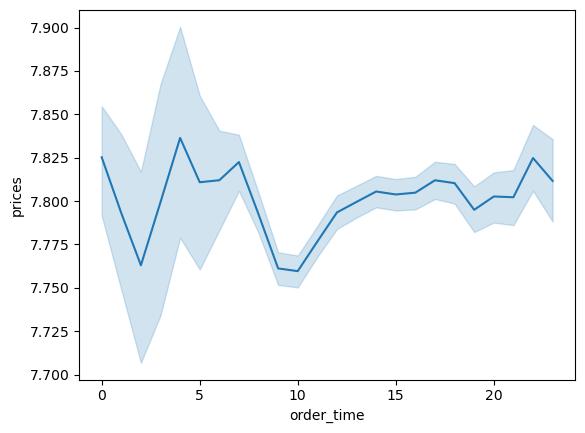

In [57]:
# Create a line chart to show the development of the “prices” column across the order time column
line2 = sns.lineplot(data = df_sample_order_time, x = 'order_time',y = 'prices')

In [58]:
# Export it outside of Jupyter in the form of an image file 
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_ordertime.png'))

#### Observation
Line chart shows that the most busy time is in the morning and also peaks late afternoon until evening, leaving night hours as slow time, which makes sense, people mostly do grocery before or after work.

### 6. Line chart for connection between  number of dependants and age

In [59]:
# Create df that contains only columns needed for the chart to speed up the process
df_sample_age = small[['Age','Number_of_dependants']]
df_sample_age

,Age,Number_of_dependants
0,57,3
2,57,3
3,57,3
6,57,3
10,57,3
...,...,...
32434188,19,0
32434191,44,3
32434199,47,2
32434204,38,1


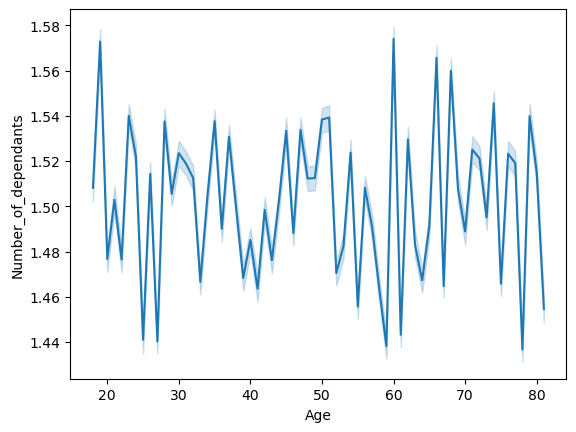

In [60]:
# Create a line chart to show the connections between age and number of dependants
line3 = sns.lineplot(data = df_sample_age, x = 'Age',y = 'Number_of_dependants')

In [61]:
# Export it outside of Jupyter in the form of an image file 
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dependants_connection.png'))

#### Observation 
From line chart I don't really see a close connection between age and number of dependents. Although looks like 20-30 year olds have higher number of dependants vs 50-55 year olds. It is interesting to see that closer to 80 years old the number of dependants also grow. Could it be because of caregivers or if adults who take care of their elders are considered dependants.

## 7. Scatterplot to visualize connection between age and income

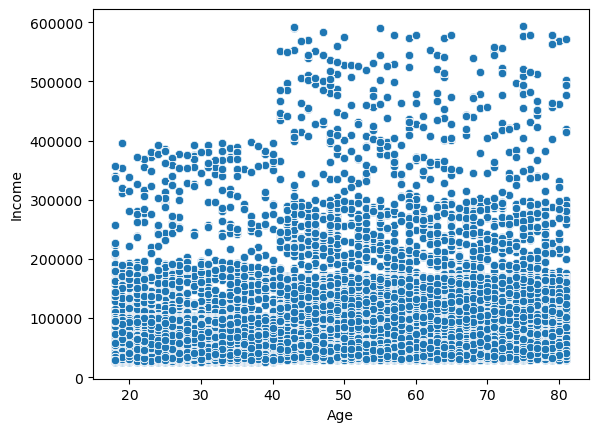

In [62]:
# Use scatterplot to see in vis if there is a relationship between age and spending power (income)
scat2=sns.scatterplot(x = 'Age', y = 'Income',data = ords_prods_customers_merged)

In [63]:
# Export it outside of Jupyter in the form of an image file 
scat2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_connection.png'))

#### Observation
From the scatterplot we can observe that majority make under 200K between ages of 20 to 40. We also can notice that 400K is more often for 20 to 40 ages than 300k. Around 40 years and above we see that income jumps to between 200k to 300k for majority and some make 600k. Overall the average income stays around 200k for 20-40 years olders, and 300k for 40 and above. 